In [1]:
import tensorflow as tf
import os

In [2]:
gpus= tf.config.experimental.list_physical_devices("GPU")

In [ ]:
gpus

In [5]:
tf.device('/device:GPU:1')

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
data="D:\data"

In [7]:
import cv2
import imghdr

In [8]:
image_exts=['jpeg','jpg','bmp','png']

In [9]:
os.listdir(data)

['happy', 'sad']

In [10]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data,image_class)):
        image_path=os.path.join(data,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image {}".format(image_path))
                      

image not in extD:\data\happy\3c346409d336d5f09a7f.svg


In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
dataa=tf.keras.utils.image_dataset_from_directory("D:\data")

Found 593 files belonging to 2 classes.


In [13]:
dataa

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator=dataa.as_numpy_iterator()

In [15]:
batch=data_iterator.next()

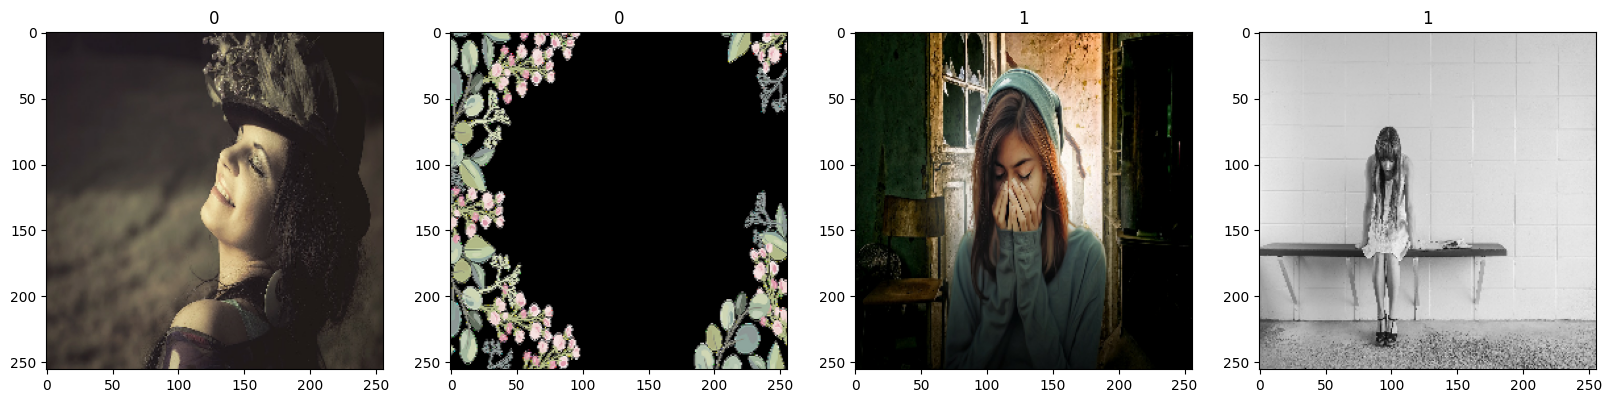

In [16]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
dataa=dataa.map(lambda x,y:(x/255,y))

In [18]:
scaled_iterator=dataa.as_numpy_iterator()

In [19]:
batch=scaled_iterator.next()

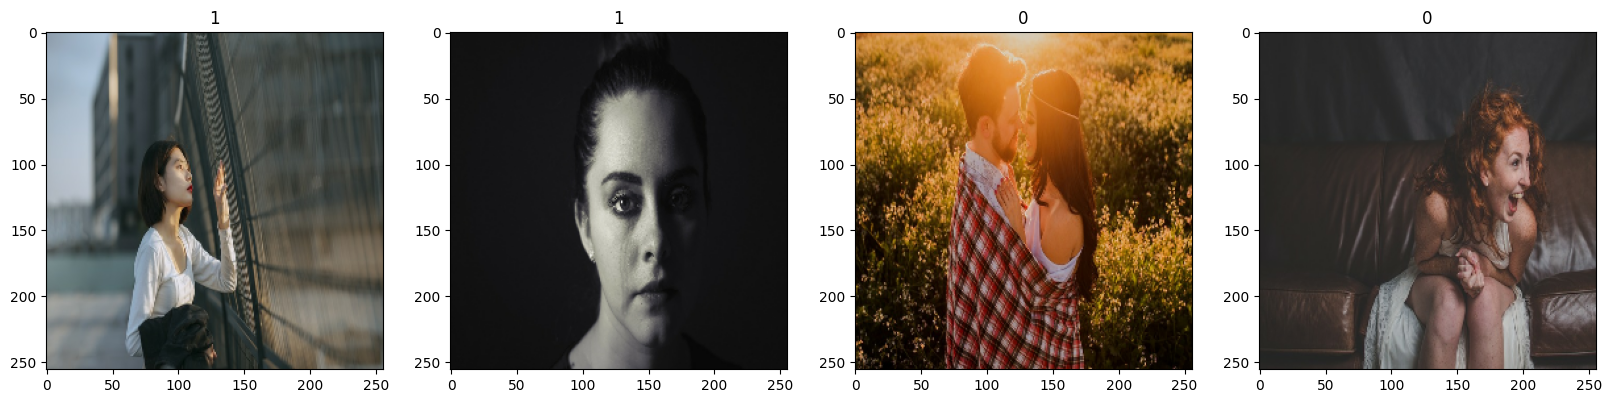

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [21]:
batch[0].min()

0.0

In [22]:
train_size=int(len(dataa)*0.7)
val_size=int(len(dataa)*0.2)+1
test_size=int(len(dataa)*0.1)+1

In [23]:
train=dataa.take(train_size)
val=dataa.take(val_size)
test=dataa.take(test_size)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [25]:
model=Sequential()

In [26]:
model = Sequential()

model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [29]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
13/13 [==============================] - 4s 185ms/step - loss: 0.6901 - accuracy: 0.5337 - val_loss: 0.6449 - val_accuracy: 0.5156
Epoch 2/20
13/13 [==============================] - 3s 207ms/step - loss: 0.6149 - accuracy: 0.6635 - val_loss: 0.5723 - val_accuracy: 0.7422
Epoch 3/20
13/13 [==============================] - 3s 214ms/step - loss: 0.5449 - accuracy: 0.7404 - val_loss: 0.4614 - val_accuracy: 0.8047
Epoch 4/20
13/13 [==============================] - 3s 209ms/step - loss: 0.4964 - accuracy: 0.7837 - val_loss: 0.4549 - val_accuracy: 0.7500
Epoch 5/20
13/13 [==============================] - 3s 230ms/step - loss: 0.4060 - accuracy: 0.8389 - val_loss: 0.2938 - val_accuracy: 0.8984
Epoch 6/20
13/13 [==============================] - 3s 228ms/step - loss: 0.3313 - accuracy: 0.8534 - val_loss: 0.2230 - val_accuracy: 0.9062
Epoch 7/20
13/13 [==============================] - 3s 222ms/step - loss: 0.2432 - accuracy: 0.9063 - val_loss: 0.1573 - val_accuracy: 0.9609
Epoch 

In [30]:
hist.history

{'loss': [0.690122127532959,
  0.6149104237556458,
  0.544854462146759,
  0.4964465796947479,
  0.40595781803131104,
  0.33127790689468384,
  0.24317535758018494,
  0.20305472612380981,
  0.1363118588924408,
  0.08527961373329163,
  0.06942659616470337,
  0.04998126998543739,
  0.07380727678537369,
  0.04715130105614662,
  0.05383986607193947,
  0.025243867188692093,
  0.025623224675655365,
  0.0362006276845932,
  0.00840020552277565,
  0.013094884343445301],
 'accuracy': [0.5336538553237915,
  0.6634615659713745,
  0.7403846383094788,
  0.7836538553237915,
  0.8389423489570618,
  0.853365421295166,
  0.9062500596046448,
  0.942307710647583,
  0.947115421295166,
  0.9687500596046448,
  0.9807692766189575,
  0.9855769872665405,
  0.9711538553237915,
  0.9903846383094788,
  0.9927884936332703,
  0.9951923489570618,
  0.9879807829856873,
  0.9879807829856873,
  0.9975962042808533,
  0.9975962042808533],
 'val_loss': [0.6448768377304077,
  0.5722585916519165,
  0.46138638257980347,
  0.454

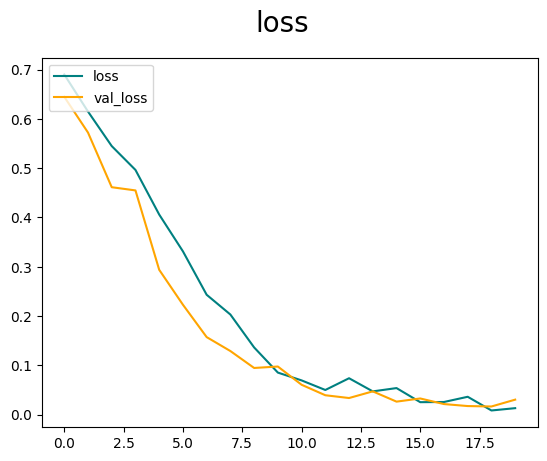

In [31]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [33]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 45ms/step


In [35]:
pre.result().numpy()


1.0

In [36]:
acc.result().numpy()

1.0

In [37]:
re.result().numpy()

1.0

In [38]:
img=cv2.imread('C:/Users/vikra/Downloads/happytest.jpg')


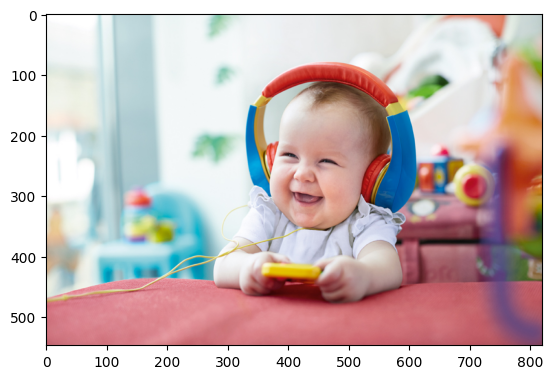

In [39]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

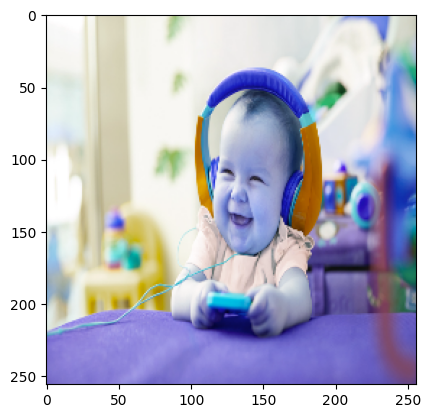

In [40]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 107ms/step


In [42]:
yhat

array([[0.39358842]], dtype=float32)

In [43]:
if yhat >0.5:
    print("sad")
else:
    print("happy")

happy


In [44]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join("D:",'happysadmodel.h5'))